<a href="https://colab.research.google.com/github/priyanka7320/Breast-Cancer-Classification-/blob/main/CorzioCapestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initializing all required libraries**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from scipy.stats import spearmanr, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the CSV files**

2. Read the two files as numpy matrices named male and female. Each matrix consists
of seven

In [ ]:
# Reading the datastes and initializing the paths
male_file = "/content/nhanes_adult_male_bmx_2020.csv"
female_file = "/content/nhanes_adult_female_bmx_2020.csv"

# Read CSV files into pandas DataFrames, trying tab as a delimiter and skipping the first two rows
male_df = pd.read_csv(male_file, sep='\t', skiprows=2)
female_df = pd.read_csv(female_file, sep='\t', skiprows=2)

# Select the required 7 columns (adjust names if slightly different in your files)
required_columns = [
    "BMXWT",   # Weight (kg)
    "BMXHT",   # Standing height (cm)
    "BMXARML", # Upper arm length (cm)
    "BMXLEG",  # Upper leg length (cm)
    "BMXARMC", # Arm circumference (cm)
    "BMXHIP",  # Hip circumference (cm)
    "BMXWAIST" # Waist circumference (cm)
]

# Assuming the data is in the first column and comma-separated
# Split the single column into multiple columns
male_df = male_df.iloc[:, 0].str.split(',', expand=True)
female_df = female_df.iloc[:, 0].str.split(',', expand=True)


# Rename columns based on the required columns
male_df.columns = required_columns
female_df.columns = required_columns

# Convert columns to numeric, coercing errors
for col in required_columns:
    male_df[col] = pd.to_numeric(male_df[col], errors='coerce')
    female_df[col] = pd.to_numeric(female_df[col], errors='coerce')

# Concatenate the dataframes
combined_df = pd.concat([male_df, female_df])

In [ ]:
# Getting the information from concated file
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8334 entries, 0 to 4236
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     8302 non-null   float64
 1   BMXHT     8302 non-null   float64
 2   BMXARML   8302 non-null   float64
 3   BMXLEG    8302 non-null   float64
 4   BMXARMC   8302 non-null   float64
 5   BMXHIP    8302 non-null   float64
 6   BMXWAIST  8302 non-null   float64
dtypes: float64(7)
memory usage: 520.9 KB


In [ ]:
# Reading the first 5 rows from the dataset
combined_df.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Reading the last 5 rows from the dataset
combined_df.tail()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
4232,66.8,157.0,32.6,38.4,30.7,103.8,92.5
4233,116.9,167.4,42.2,43.0,40.7,128.4,120.0
4234,73.0,159.6,36.2,37.0,31.4,104.6,99.3
4235,78.6,168.5,38.1,40.2,36.0,102.4,98.5
4236,82.8,147.8,34.8,32.8,39.5,121.4,110.0


In [ ]:
# Checking the data types
combined_df.dtypes

,0
BMXWT,float64
BMXHT,float64
BMXARML,float64
BMXLEG,float64
BMXARMC,float64
BMXHIP,float64
BMXWAIST,float64


3. On a single plot draw two histograms: for female
weights (top subfigure) and for male weights (bottom subfigure) Call
matplotlib.pyplot.xlim to make the x-axis limits identical for both subfigures


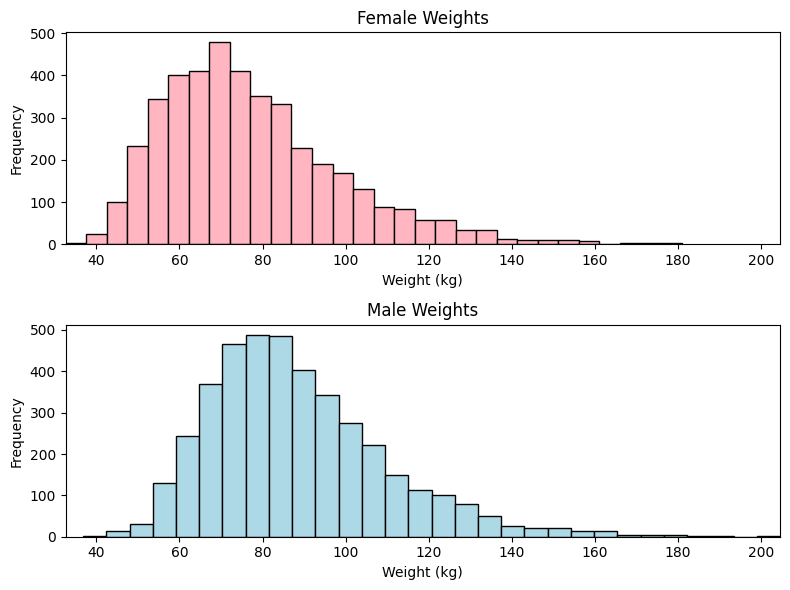

In [ ]:
# Extract weight column (BMXWT)
male_weights = male_df["BMXWT"].dropna()
female_weights = female_df["BMXWT"].dropna()

# Work out common x-axis limits
xmin = min(male_weights.min(), female_weights.min())
xmax = max(male_weights.max(), female_weights.max())

# Create subplots
plt.figure(figsize=(8,6))

# Top subplot: Female weights
plt.subplot(2,1,1)
plt.hist(female_weights, bins=30, color="lightpink", edgecolor="black")
plt.title("Female Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(xmin, xmax)

# Bottom subplot: Male weights
plt.subplot(2,1,2)
plt.hist(male_weights, bins=30, color="lightblue", edgecolor="black")
plt.title("Male Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()

4. Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by
side, giving the male and female weights so that they can be compared to each other.
Note that the boxplot function can be fed with a list of two vectors like [female_weights,
male_weights]. In your own words, discuss the results.

/tmp/ipython-input-2931925324.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])


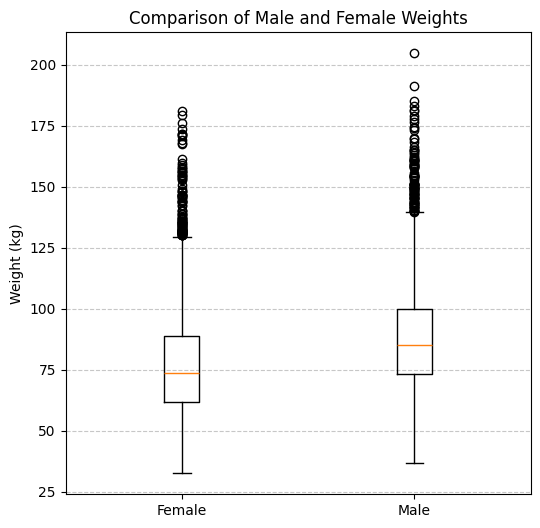

In [ ]:
# Extract weight column (BMXWT)
male_weights = male_df["BMXWT"].dropna()
female_weights = female_df["BMXWT"].dropna()

# Create boxplot
plt.figure(figsize=(6,6))
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])
plt.title("Comparison of Male and Female Weights")
plt.ylabel("Weight (kg)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

5. Compute the basic numerical aggregates of the male and female weights (measures
of location, dispersion, and shape). In your own words, describe and compare the two
distributions (e.g., are they left skewed, which one has more dispersion, and so forth).

In [ ]:
def summary_stats(data):
    return {
        "count": len(data),
        "mean": data.mean(),
        "median": data.median(),
        "std_dev": data.std(),
        "variance": data.var(),
        "min": data.min(),
        "max": data.max(),
        "range": data.max() - data.min(),
        "IQR": data.quantile(0.75) - data.quantile(0.25),
        "skewness": skew(data),
        "kurtosis": kurtosis(data)
    }

male_stats = summary_stats(male_weights)
female_stats = summary_stats(female_weights)

print("Male Weight Stats:\n", male_stats)
print("\nFemale Weight Stats:\n", female_stats)

Male Weight Stats:
 {'count': 4081, 'mean': np.float64(88.36454300416565), 'median': 85.0, 'std_dev': 21.42156142684041, 'variance': 458.88329396389696, 'min': 36.8, 'max': 204.6, 'range': 167.8, 'IQR': np.float64(26.5), 'skewness': np.float64(0.9842810741662347), 'kurtosis': np.float64(1.4742884754078238)}

Female Weight Stats:
 {'count': 4221, 'mean': np.float64(77.40379057095475), 'median': 73.6, 'std_dev': 21.54506056889292, 'variance': 464.1896349172645, 'min': 32.6, 'max': 180.9, 'range': 148.3, 'IQR': np.float64(27.1), 'skewness': np.float64(1.03336107186799), 'kurtosis': np.float64(1.4009683480659731)}


6. To the female matrix, add the eight column which gives the body mass indices of all the female participants.



---




Formula for BMI:
BMI = Weight (kg) / (Hight(m))2



*   Weight = already in kg (BMXWT)
*   Height = given in cm (BMXHT), so we need to convert to meters



In [ ]:
# Required 7 columns
required_columns = [
    "BMXWT",   # Weight (kg)
    "BMXHT",   # Standing height (cm)
    "BMXARML", # Upper arm length (cm)
    "BMXLEG",  # Upper leg length (cm)
    "BMXARMC", # Arm circumference (cm)
    "BMXHIP",  # Hip circumference (cm)
    "BMXWAIST" # Waist circumference (cm)
]

# Keep only required columns
female_df = female_df[required_columns]

# Drop missing values
female_df = female_df.dropna()

# Convert to numpy matrix
female = female_df.to_numpy()

# --- Add BMI as 8th column ---
weights = female[:, 0]               # kg
heights_m = female[:, 1] / 100       # convert cm -> meters
bmi = weights / (heights_m ** 2)

# Append BMI as new column
female_with_bmi = np.column_stack((female, bmi))

print("Female matrix shape with BMI:", female_with_bmi.shape)
print("Sample (first 5 rows):\n", female_with_bmi[:5])

Female matrix shape with BMI: (4221, 8)
Sample (first 5 rows):
 [[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


7. Create a new matrix zfemale being a version of the female dataset with all its columns
standardised (by computing the z-scores of each column).



---


z= x − μ / σ

where 𝜇 = column mean

𝜎 = column standard deviation

This gives each column mean = 0, std = 1 → called z-scores.

In [ ]:
# Filter required columns and drop NaN
female_df = female_df[required_columns].dropna()

# Convert to NumPy matrix
female = female_df.to_numpy()

# --- Standardize (compute z-scores) ---
scaler = StandardScaler()
zfemale = scaler.fit_transform(female)

print("Original female shape:", female.shape)
print("Standardised zfemale shape:", zfemale.shape)

# Show first 5 rows
print("First 5 rows of zfemale:\n", zfemale[:5])

Original female shape: (4221, 7)
Standardised zfemale shape: (4221, 7)
First 5 rows of zfemale:
 [[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089  ]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609]]


8. Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight,
waist circumference, hip circumference, and BMI of the females (based on zfemale).
Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables.
Interpret the obtained results.



---

Focusing on 5 variables from standardised female dataset:



*   Weight (BMXWT)
*   Height (BMXHT)


*   Waist Circumference (BMXWAIST)
*   Hip Circumference (BMXHIP)
*   BMI as calculated earlier


---



**1. Pearson’s Correlation (r)**

* Measures linear relationship between two variables.

* Assumes the data is continuous and normally distributed.

* Range: -1 to +1

    +1 → perfect positive linear relationship

    0 → no linear relationship

    -1 → perfect negative linear relationship

* Formula:
r = Cov(X,Y) / σXσY
	​

---

**2. Spearman’s Rank Correlation (ρ)**

* Measures monotonic relationship (whether values increase/decrease together).

* Works on ranks, so it doesn’t assume linearity.

* Useful when data is not normally distributed or has outliers.

* Range: -1 to +1 (similar interpretation as Pearson).

* Formula (if no ties):

ρ = 1 − 6∑di2 / n(n2−1)

where
𝑑𝑖 = difference between ranks of X and Y.



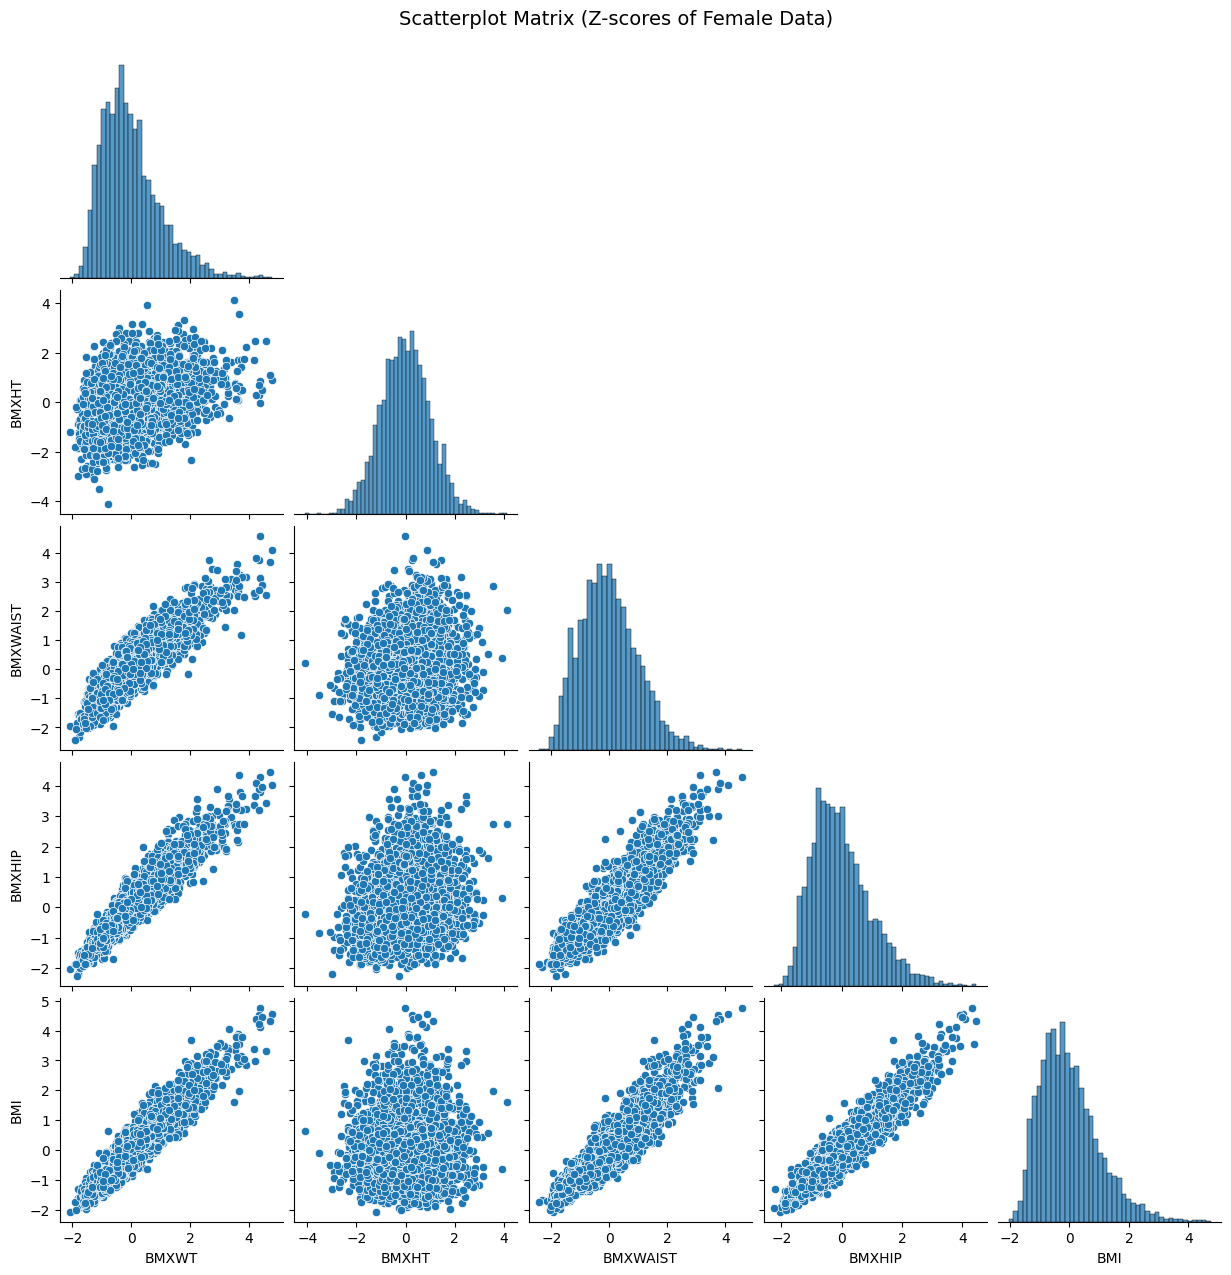


Pearson Correlation Matrix:
              BMXWT     BMXHT  BMXWAIST    BMXHIP       BMI
BMXWT     1.000000  0.345496  0.904550  0.946553  0.945900
BMXHT     0.345496  1.000000  0.126547  0.202895  0.033077
BMXWAIST  0.904550  0.126547  1.000000  0.897407  0.921198
BMXHIP    0.946553  0.202895  0.897407  1.000000  0.944199
BMI       0.945900  0.033077  0.921198  0.944199  1.000000

Spearman Correlation Matrix:
              BMXWT     BMXHT  BMXWAIST    BMXHIP       BMI
BMXWT     1.000000  0.338860  0.900169  0.946634  0.937999
BMXHT     0.338860  1.000000  0.108587  0.205405  0.019897
BMXWAIST  0.900169  0.108587  1.000000  0.888037  0.923114
BMXHIP    0.946634  0.205405  0.888037  1.000000  0.934196
BMI       0.937999  0.019897  0.923114  0.934196  1.000000


In [ ]:
# Keeping relevant columns
required_columns = ["BMXWT", "BMXHT", "BMXWAIST", "BMXHIP"]
female_df = female_df[required_columns].dropna()

# Compute BMI
female_df["BMI"] = female_df["BMXWT"] / ((female_df["BMXHT"] / 100) ** 2)

# Standardise (z-scores)
scaler = StandardScaler()
zfemale = pd.DataFrame(
    scaler.fit_transform(female_df),
    columns=female_df.columns
)

# --- Scatterplot matrix (pairplot) ---
sns.pairplot(zfemale, diag_kind="hist", corner=True)
plt.suptitle("Scatterplot Matrix (Z-scores of Female Data)", y=1.02, fontsize=14)
plt.show()

# --- Correlation coefficients ---
# Pearson (linear correlation)
pearson_corr = zfemale.corr(method="pearson")

# Spearman (rank correlation, good for monotonic trends)
spearman_corr = zfemale.corr(method="spearman")

print("\nPearson Correlation Matrix:\n", pearson_corr)
print("\nSpearman Correlation Matrix:\n", spearman_corr)


9. Compute the waist circumference to height ratio and the waist circumference to hip
circumference ratio of the male and female participants by adding two more columns to
the males and females matrices.



---
Male and female matrices by adding:


*   **Waist-to-Height Ratio (WHtR):**
     WHtR = Waist Circumference (cm) / Height (cm)

*   **Waist-to-Hip Ratio (WHR):**
      WHR = Waist Circumference (cm) / Hip circumference (cm)





In [ ]:
# --- Add WHtR and WHR ---
# For both datasets: columns are [weight, height, upper arm, upper leg, arm circ, hip, waist]

# Define required columns for male data
required_columns = [
    "BMXWT",   # Weight (kg)
    "BMXHT",   # Standing height (cm)
    "BMXARML", # Upper arm length (cm)
    "BMXLEG",  # Upper leg length (cm)
    "BMXARMC", # Arm circumference (cm)
    "BMXHIP",  # Hip circumference (cm)
    "BMXWAIST" # Waist circumference (cm)
]

# Filter required columns and drop NaN for male data
male_df_cleaned = male_df[required_columns].dropna()

# Convert to NumPy matrix
male = male_df_cleaned.to_numpy()

male_height = male[:, 1]
male_hip = male[:, 5]
male_waist = male[:, 6]

# Reload female data to ensure all required columns are present
female_file = "/content/nhanes_adult_female_bmx_2020.csv"
female_df = pd.read_csv(female_file, sep='\t', skiprows=2)
female_df = female_df.iloc[:, 0].str.split(',', expand=True)
female_df.columns = required_columns

# Remove the header row from the female_df and convert columns to numeric
female_df = female_df.iloc[1:].copy() # Remove the header row
for col in required_columns:
    female_df[col] = pd.to_numeric(female_df[col], errors='coerce')


# Filter required columns and drop NaN for female data
female_df_cleaned = female_df[required_columns].dropna() # Using required_columns for consistency
female = female_df_cleaned.to_numpy()


female_height = female[:, 1]
female_hip = female[:, 5]
female_waist = female[:, 6]

# Ratios
male_whtr = male_waist / male_height
male_whr = male_waist / male_hip

female_whtr = female_waist / female_height
female_whr = female_waist / female_hip

# Add as new columns
male_extended = np.column_stack((male, male_whtr, male_whr))
female_extended = np.column_stack((female, female_whtr, female_whr))


print("Male matrix shape (with ratios):", male_extended.shape)
print("Female matrix shape (with ratios):", female_extended.shape)
print("\nFirst 5 rows (Male):\n", male_extended[:5])
print("\nFirst 5 rows (Female):\n", female_extended[:5])

Male matrix shape (with ratios): (4081, 9)
Female matrix shape (with ratios): (4221, 9)

First 5 rows (Male):
 [[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852]
 [103.7        185.3         47.          44.          32.
  107.8        109.6          0.59147329   1.01669759]
 [ 86.         167.8         39.5         38.4         29.
  106.4        108.3          0.6454112    1.01785714]
 [ 99.4        181.6         40.4         39.9         36.
  120.2        107.           0.58920705   0.89018303]]

First 5 rows (Female):
 [[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9          0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1          0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
 

10. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution
of the waistto-height ratio and the waist-to-hip ratio of both male and female participants.
Explain what you see.



---

4 box-and-whisker plots side by sode are called BOXPLOTS considering :



*   Waist-to-Height Ratio (MALE)
*   Waist-to-Height Ratio (FEMALE)


*   Waist-to-Hip Ratio (MALE)
*   Waist-to-Hip Ratio (MALE)






/tmp/ipython-input-3599961775.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True)


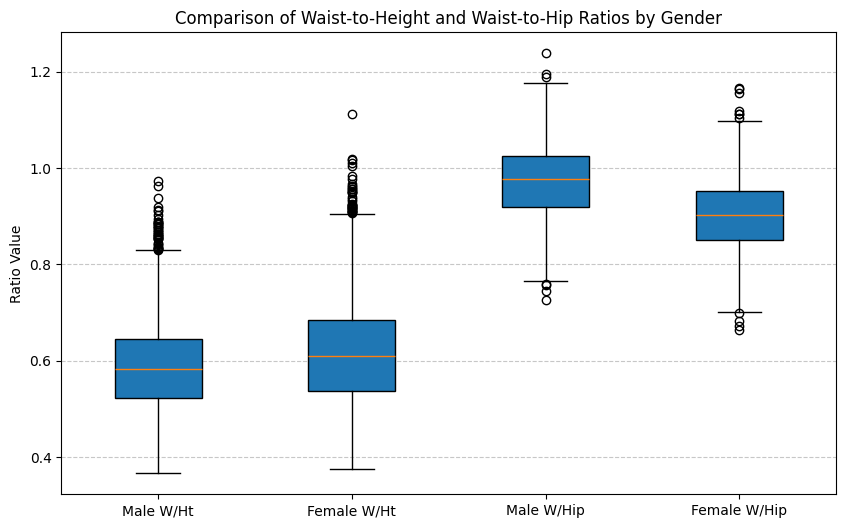

In [ ]:
# Calculate ratios
male_df["Waist_Height"] = male_df["BMXWAIST"] / male_df["BMXHT"]
male_df["Waist_Hip"] = male_df["BMXWAIST"] / male_df["BMXHIP"]

female_df["Waist_Height"] = female_df["BMXWAIST"] / female_df["BMXHT"]
female_df["Waist_Hip"] = female_df["BMXWAIST"] / female_df["BMXHIP"]

# Prepare data for plotting
data = [
    male_df["Waist_Height"].dropna(),
    female_df["Waist_Height"].dropna(),
    male_df["Waist_Hip"].dropna(),
    female_df["Waist_Hip"].dropna()
]

labels = [
    "Male W/Ht", "Female W/Ht",
    "Male W/Hip", "Female W/Hip"
]

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True)

plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios by Gender")
plt.ylabel("Ratio Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observation for the above box-and-whisker plots**



1.  Median (Line inside the box): Tells the typical ration value.
2.   Spread (Box Size): Wider boxs are more variability in participants.
3. Outliers (dots):
People with unusually high or low ratios.
4. Comparison between groups:

* If male vs female waist-to-height: you can check which gender tends to have higher central ratios.

* If male vs female waist-to-hip: shows differences in body fat distribution between genders.

5. Waist-to-Height Ratio (WHtR):
Usually similar for men and women, but males may show a slightly higher median (more central fat).

6. Waist-to-Hip Ratio (WHR):
Males typically have higher WHR (straighter shape), while females have lower WHR (wider hips).
→ The female WHR boxplot should be shifted lower than the male WHR.

7. Spread:
WHR often varies more in women, WHtR more consistent.



11. In your own words, list some advantages and disadvantages of BMI, waist-to-height
ratio, and waist-to-hip ratio.


---

---


**1. Body Mass Index (BMI):**

Formula: weight (kg) ÷ height (m²)
*Advantages*

* It is very quick and inexpensive to calculate, it only needs weight and height details.
*   It is used worldwide and easy to compare results with the satandard cut-off.
*   It works well for studying large groups and populations.



*Disadvantages*

* Doesn’t show how much of the weight is fat versus muscle or bone.

* Doesn’t reveal where fat is stored in the body.

* Can give misleading results for athletes, older adults, children, or people of different ethnic backgrounds.


---


**2. Waist-to-Height Ratio (WHtR):**

Formula: waist circumference ÷ height

*Advantages*

* Directly measures abdominal fat – belly fat (especially around organs) is more dangerous than fat in other areas.

* Takes body size into account – since it compares waist with height, it adjusts for different builds.

* Easy health rule – “Keep your waist less than half your height” is simple to understand.

* Better health predictor than BMI – research shows it can more accurately predict risks like heart disease, diabetes, and stroke.

* Works across ages and ethnic groups – tends to be more reliable than BMI for diverse populations.


*Disadvantages*

* Measurement can be tricky – waist size changes depending on where and how it’s measured

* Not widely used in clinics – many doctors and health systems still prefer BMI.

* Doesn’t separate types of fat – can’t tell whether the fat is deep inside the abdomen (visceral fat, more harmful) or just under the skin (subcutaneous fat).

* Less research history – compared to BMI, it has fewer decades of data, though evidence is growing.



---


**3. Waist-to-Hip Ratio (WHR):**

Formula: waist circumference ÷ hip circumference

*Advantages*

* Shows fat distribution clearly – helps distinguish between “apple-shaped” (more fat around the belly) and “pear-shaped” (more fat around hips/thighs) bodies.

* Strong link to health risk – central obesity (high WHR) is tied to diabetes, hypertension, and heart disease even when BMI is normal.

* Useful for normal-BMI individuals – can identify hidden risks that BMI might miss.

* Backed by studies – WHO considers WHR an important measure for assessing abdominal obesity.

*Disadvantages*

* Hip measurement less reliable – depends on clothing, posture, and the exact point of measurement, which can reduce accuracy.

* Ratios can be misleading – if both waist and hips are very large (or very small), the ratio might look “normal” even if the person is unhealthy.

* Not as popular in practice – fewer doctors use it compared to BMI or WHtR.

* More steps to measure – requires two measurements (waist + hips), so slightly less convenient.



12. Print out the standardised body measurements for the 5 persons with the lowest BMI
and the 5 persons with the 5 highest BMI (e.g., call print for a subset of zfemale comprised
of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results.

In [ ]:
# Combine datasets for analysis
df = pd.concat([male_df, female_df], ignore_index=True)

# Drop rows with any missing values in the required columns for BMI calculation
df = df.dropna(subset=["BMXWT", "BMXHT"])

# Compute BMI
df["BMI"] = df["BMXWT"] / (df["BMXHT"] / 100) ** 2  # height in meters

# Define the initial columns that were used before adding ratios
initial_columns = [
    "BMXWT",   # Weight (kg)
    "BMXHT",   # Standing height (cm)
    "BMXARML", # Upper arm length (cm)
    "BMXLEG",  # Upper leg length (cm)
    "BMXARMC", # Arm circumference (cm)
    "BMXHIP",  # Hip circumference (cm)
    "BMXWAIST" # Waist circumference (cm)
]

# Select the columns for standardization (including the newly computed BMI)
columns_for_standardization = initial_columns + ["BMI"]
zdf = df[columns_for_standardization] # Select only relevant columns

# Standardize (z-scores) for each measurement
# Use StandardScaler to avoid potential division by zero if a column has zero standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
zdf = pd.DataFrame(scaler.fit_transform(zdf), columns=zdf.columns)


# Get indices of lowest and highest 5 BMI from the original df
lowest_idx = np.argsort(df["BMI"].values)[:5]
highest_idx = np.argsort(df["BMI"].values)[-5:]

# Select rows from the standardized dataframe based on the indices from the original df
# Ensure that the indices are applied to the zdf dataframe which has the same index as df
subset = zdf.iloc[np.concatenate([lowest_idx, highest_idx])]

print(subset)

         BMXWT     BMXHT   BMXARML    BMXLEG   BMXARMC    BMXHIP  BMXWAIST  \
4343 -2.263979 -1.528620 -1.809305 -1.516147 -2.481276 -2.076565 -2.075569   
7559 -2.070020 -0.802434 -1.948584 -0.212346 -2.746278 -1.872954 -2.192797   
6207 -1.736232  0.600200 -0.033494 -0.055890 -2.556991 -1.676364 -1.835253   
2570 -2.074531 -0.971546 -0.033494  0.257023 -2.746278 -1.922102 -1.178778   
6834 -2.033935 -0.852173 -0.729891 -0.108042 -2.594848 -2.308260 -1.987649   
7103  4.087029 -0.314994  0.837001 -1.490071  3.405539  4.530254  2.865575   
5553  3.983284 -0.474158  1.777136  1.091455  4.484473  4.460044  3.733060   
5185  4.425329 -0.046404  1.185199  0.987151  3.859827  4.572381  4.067158   
1880  5.494355  0.848894  0.906640 -0.290574  3.765184  4.319622  4.143356   
5177  3.996816 -0.693009 -0.590611 -0.681714  2.799822  4.895349  4.565376   

           BMI  
4343 -2.173294  
7559 -2.112815  
6207 -2.086601  
2570 -2.073671  
6834 -2.054802  
7103  4.941019  
5553  4.998545  
5185 

**References: **

* https://github.com/gagolews/teaching-data/tree/master/marek
* https://www.calculator.net/bmi-calculator.html
* https://chatgpt.com/c/68d0da2b-fd64-8329-80f9-7a9fe7b4c599